# Задание 1

In [1]:
from PIL import Image
import numpy as np

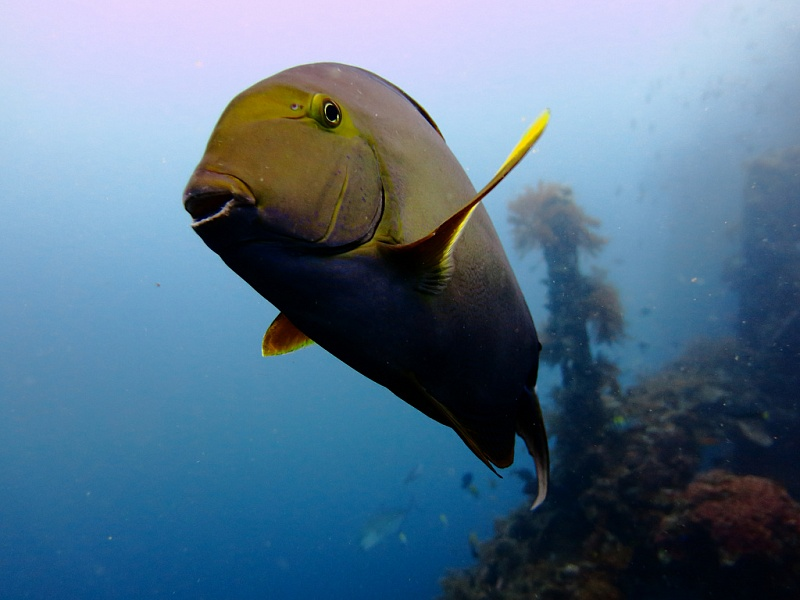

In [80]:
im = Image.open("im1.jpg")
im

(600, 401)


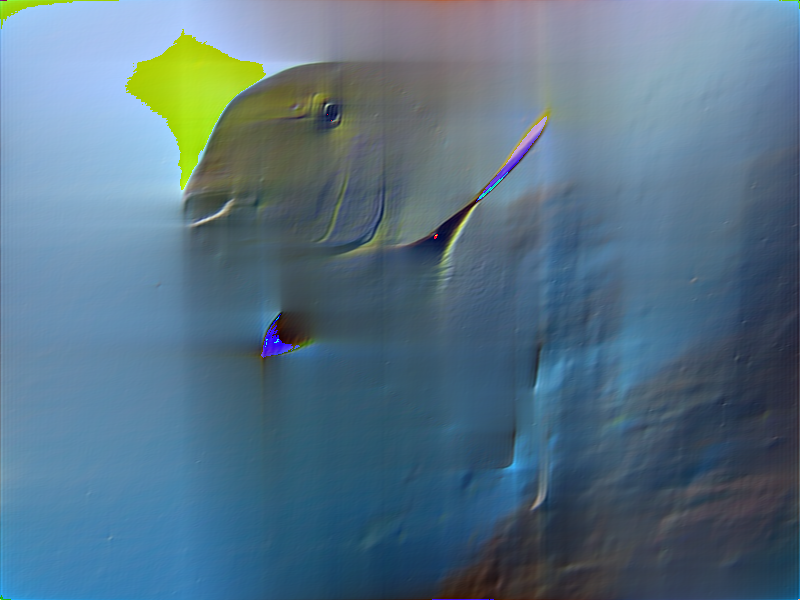

In [81]:
im = Image.open("im1.jpg")
r, g, b = im.split()
r_spec = np.fft.rfft2(r)
g_spec = np.fft.rfft2(g)
b_spec = np.fft.rfft2(b)

print(r_spec.shape)

r_spec[300:, :] = 0
g_spec[300:, :] = 0
b_spec[300:, :] = 0

r_spec[:, 200:] = 0
g_spec[:, 200:] = 0
b_spec[:, 200:] = 0

r_trans = Image.fromarray(np.uint8(np.fft.irfft2(r_spec)))
g_trans = Image.fromarray(np.uint8(np.fft.irfft2(g_spec)))
b_trans = Image.fromarray(np.uint8(np.fft.irfft2(b_spec)))

Image.merge("RGB", (r_trans, g_trans, b_trans))

# Задание 2

**добавим шумы**

In [133]:
import scipy.io.wavfile as wavfile

rate, wav = wavfile.read("in10.wav") # читаепм файл

r, l = wav[:, 0], wav[:, 1] # разделили на лево и право
r_spec, l_spec = np.fft.rfft(r), np.fft.rfft(l) # левый и правый спектры

# добвим случайные величины для к всем частотам до SIZE
SIZE = 10000
RANGE = 10000000
r_spec[:SIZE] += np.random.uniform(-RANGE, RANGE, size=SIZE) 
l_spec[:SIZE] += np.random.uniform(-RANGE, RANGE, size=SIZE) 

r_new = np.int16(np.fft.irfft(r_spec))
l_new = np.int16(np.fft.irfft(r_spec))

wav_noise = np.vstack((r_new, l_new)).T

wavfile.write("out_noise.wav", rate, wav_noise)

**удалим шумы**

In [134]:
rate, wav = wavfile.read("out_noise.wav") # читаепм файл

r, l = wav[:, 0], wav[:, 1] # разделили на лево и право
r_spec, l_spec = np.fft.rfft(r), np.fft.rfft(l) # левый и правый спектры

r_spec[:SIZE] = 0 
l_spec[:SIZE] = 0

r_new = np.int16(np.fft.irfft(r_spec))
l_new = np.int16(np.fft.irfft(r_spec))

wav_denoise = np.vstack((r_new, l_new)).T

wavfile.write("out_denoise.wav", rate, wav_denoise)

Файлы:  
[входной](in10.wav)  
[шумный](out_noise.wav)  
[с удалением шумов](out_denoise.wav)  